# The Art of Data Science

## Build & Deploy ML Models in Cloud

** Motivation for the Session**

- Solve a business problem
- Understand the end-to-end approach
- Build a data-driven Machine Learning application on the cloud

##### For code, go to [https://github.com/amitkaps/datascience](https://github.com/amitkaps/datascience)

** Our approach ** is to take a case-driven example to showcase this. And we will aim to go-wide vs. go-deep to do so. The approach will be both practical and scalable. Lets start by understanding the overall steps involved in building a data-driven application.

<br>



![The Art of DataScience Process](static/datascience.svg)

<br>

## FRAME 

> "Doing data science requires more time thinking than doing."

A start-up providing loans to the consumer and has been running for the last few years. It is now planning to adopt a data-driven lens to its loan portfolio. What are the **type of questions** it can ask?
- What is the trend of loan defaults?
- Do older customers have more loan defaults?
- Which customer is likely to have a loan default?
- Why do customers default on their loan?


### Type of data-driven analytics
- **Descriptive**: Understand patterns, trends, deviations and outlier
- **Inquisitive**: Conduct hypothesis testing
- **Predictive**: Make a prediction
- **Causal**: Establish a causal link

**Our Question: What is the probability of a loan default?**

<br>

## ACQUIRE

> "Data is the new oil"

**Ways to acquire data** (typical data source)

- Download from an internal system
- Obtained from client, or other 3rd party
- Extracted from a web-based API
- Scraped from a website
- Extracted from a PDF file
- Gathered manually and recorded

**Data Formats**: flat files (e.g. csv, tsv, xls), databases (e.g. MySQL), streaming (e.g. json), storage (e.g. HDFS)

In [1]:
# Load the libraries and configuration
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv("loan.csv") 
data.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


*Target*
- **default**: whether the applicant defaulted (1) or not (0)?

*Features*
- **age**: age of the applicant
- **income**: annual income of the applicant
- **year**: no. of years of employment
- **ownership**: type of house owned
- **amount** : amount of loan requested by the applicant
- **grade**: credit grade of the applicant

<br>

## REFINE

> "Data is messy"

- **Remove** e.g. remove redundant data from the data frame
- **Derive** e.g. state and city from the location field
- **Parse** e.g. extract date from year and month column

Also, you need to check for consistency and quality of the data
- **Missing** e.g. Check for missing or incomplete data
- **Quality** e.g. Check for duplicates, accuracy, unusual data


In [2]:
# Lets check for missing values in our data
data.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

### Handling missing values

- **REMOVE** - NaN rows or columns
- **IMPUTATE** - Replace them with something? mean, median, fixed number (based on domain) or high number (e..g 999, though could have issues later)
- **BIN** - Convert to categorical variable and "missing becomes a category"
- **DOMAIN SPECIFIC** - Entry error, pipeline, etc.

In our case, let's replace missing values for years with mean


In [3]:
# There's a fillna function
data.years = data.years.fillna(np.mean(data.years))
data.years.unique()

array([  2.       ,   3.       ,   1.       ,   6.       ,   4.       ,
         0.       ,  16.       ,  12.       ,  11.       ,  15.       ,
         6.0863319,  18.       ,   8.       ,   7.       ,  34.       ,
         9.       ,  14.       ,   5.       ,  10.       ,  20.       ,
        26.       ,  19.       ,  24.       ,  61.       ,  27.       ,
        21.       ,  13.       ,  30.       ,  23.       ,  22.       ,
        31.       ,  25.       ,  17.       ,  38.       ,  28.       ,
        29.       ,  56.       ,  47.       ,  45.       ,  43.       ,
        32.       ,  33.       ,  36.       ,  40.       ,  44.       ,
        53.       ,  41.       ,  55.       ,  62.       ,  48.       ,
        37.       ,  35.       ])

<br>

## EXPLORE

> "I don't know, what I don't know"

### Data Types

**Categorical**
   - *Nominal*: home owner [rent, own, mortgage] 
   - *Ordinal*: credit grade [A > B > C > D > E]
**Continuous**
    - *Interval*: approval date  [20/04/16, 19/11/15]
    - *Ratio*: loan amount [3000, 10000]

### Visual Exploration
- Explore **One dimension visualisation**
- Explore **Two dimensions visualiation**
- Explore **Multi dimensionsal visualisation**

In [4]:
# Load the plotting libraries 
from plotnine import *
%matplotlib inline
from plotnine.themes import theme_538

# Convert `default` to categorical variable
data_plot = data.copy()
data_plot['default'] = data_plot['default'].astype('category')

### Two Dimension Exploration 

Let us see the relationship between `grade` and `default`

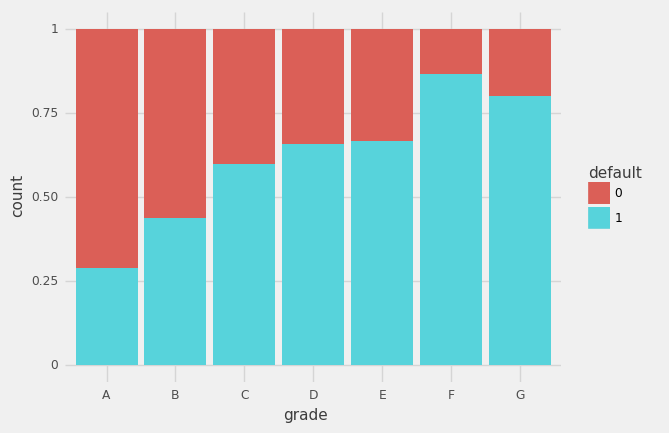

<ggplot: (288454997)>

In [5]:
ggplot(data_plot) + aes('grade', fill ="default") + geom_bar(position = 'fill') + theme_538()

### Three Dimension Exploration 

Let us see the relationship between `age`, `income` and `default`

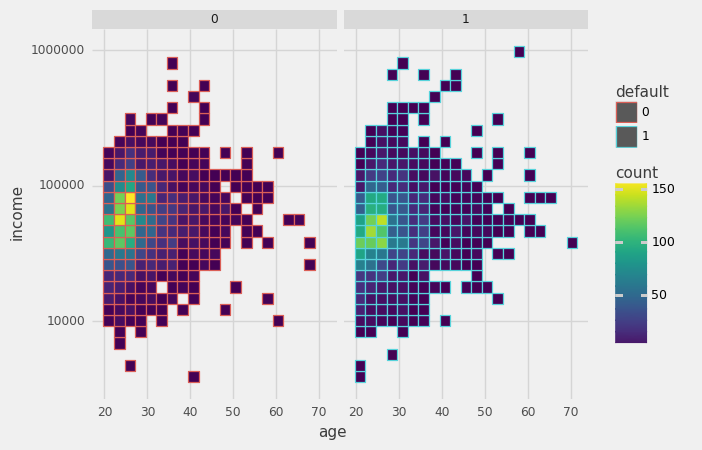

<ggplot: (-9223372036564109070)>

In [6]:
( ggplot(data_plot) + aes('age', 'income', color='default') + 
    geom_bin2d() + scale_y_log10() +
    facet_wrap("default") + theme_538()
)

## TRANSFORM

> "What is measured may not help answer what is needed "

**Scale Transformation** e.g.
- Log Transform
- Sqrt Transform

**Mutate & Summarize** e.g.
- **Convert** e.g. free text to coded value
- **Calculate** e.g. percentages, proportion
- **Merge** e.g. first and surname for full name
- **Aggregate** e.g. rollup by year, cluster by area
- **Filter** e.g. exclude based on location
- **Sample** e.g. extract a representative data
- **Summary** e.g. show summary stats like mean

**Categorical Encodings** e.g.
- Label Encoding
- One Hot Encoding 

Two of the columns are categorical in nature - `grade` and `ownership`. To build models, we need all of the features to be numeric. There exists a number of ways to transform categorical variables to numeric values.

We will use one of the popular options: `LabelEncoding`



In [7]:
# Load the library for preprocessing 
from sklearn.preprocessing import LabelEncoder

# Let's not modify the original dataset. Let's copy it in another dataset
data_encoded = data.copy()

In [8]:
# instantiate label encoder
le_grade = LabelEncoder()
le_ownership = LabelEncoder()

# fit label encoder
le_grade = le_grade.fit(data_encoded["grade"])
le_ownership = le_ownership.fit(data["ownership"])

# Transform the label
data_encoded.grade = le_grade.transform(data_encoded.grade)
data_encoded.ownership = le_ownership.transform(data_encoded.ownership)

# Lets see the encoded data now
data_encoded.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,1,2.0,3,19200.0,24
1,1,6500,0,2.0,0,66000.0,28
2,0,2400,0,2.0,3,60000.0,36
3,0,10000,2,3.0,3,62000.0,24
4,1,4000,2,2.0,3,20000.0,28


## MODEL


> "All models are wrong, Some of them are useful"


### Supervised Learning

Given a set of **feature** `X`, to predict the value of **target** `y`
- If `y` is *continuous* - **Regression**
- If `y` is *categorical* - **Classification**

**Model Family**
- Linear
- Tree-Based
- Kernel-Baed
- Neural Network

**Choosing a Model**

1. Interpretability
2. Run-time
3. Model complexity
4. Scalability

** Lets build a tree-based classifier - Decision Tree & Random Forest **

In [9]:
# Load the library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup the features and target
X = data_encoded.iloc[:,1:]
y = data_encoded.iloc[:,0]

In [10]:
# Save the prediction class and probabilities
def prediction(clf, X, y):
    clf = clf.fit(X,y)
    y_pred = clf.predict(X)
    y_proba = clf.predict_proba(X)[:,1]
    prediction = pd.DataFrame({"actual": np.array(y), "predicted": y_pred, "probability": y_proba})
    prediction['predicted'] = prediction['predicted'].astype('category')
    prediction['actual'] = prediction['actual'].astype('category')
    return prediction

In [11]:
# Build a Decision Tree Classifier
clf_tree = DecisionTreeClassifier(max_depth=10)
prediction_tree = prediction(clf_tree, X, y)

# Build a Random Forest Classifier
clf_forest = RandomForestClassifier(n_estimators=40)
prediction_forest = prediction(clf_forest, X, y)

## INSIGHT

How do we select a model 
- Lowest error on unseen data
- Cross Validation

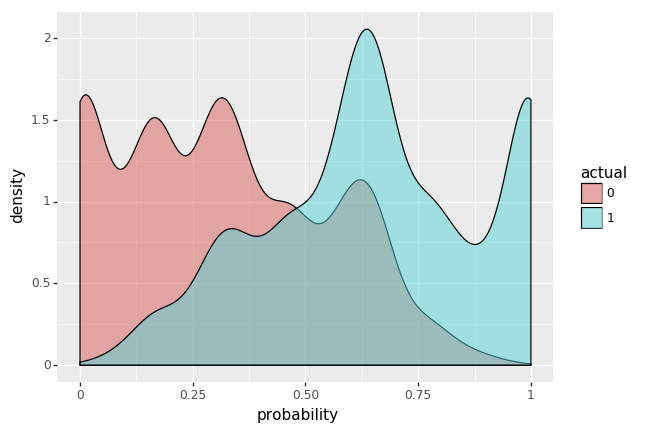

<ggplot: (291291077)>

In [12]:
ggplot(prediction_tree) + aes('probability', fill='actual') + geom_density(alpha = 0.5)

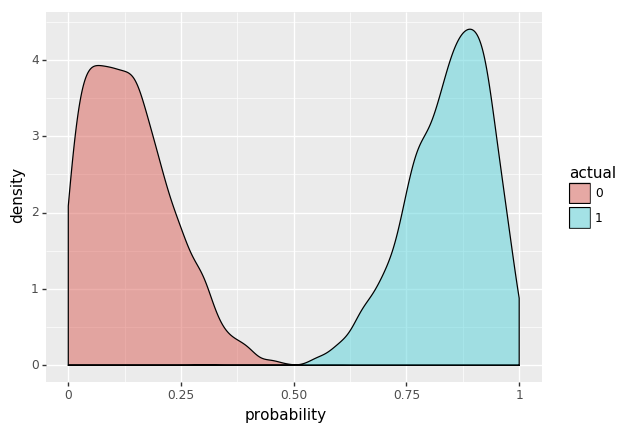

<ggplot: (291290923)>

In [13]:
ggplot(prediction_forest) + aes('probability', fill='actual') + geom_density(alpha = 0.5)

### Cross Validation

We will use `StratifiedKFold`. This ensures that in each fold, the proportion of positive class and negative class remain similar to the original dataset. This is the process we will follow to get the mean cv-score

1. Generate k-fold
2. Train the model using k-1 fold
3. Predict for the kth fold 
4. Find the accuracy.
5. Append it to the array
6. Repeat 2-5 for different validation folds
7. Report the mean cross validation score

In [14]:
y.unique()

array([0, 1])

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold

In [16]:
def cross_validation(clf, X, y, k):
    
    # Instantiate stratified k fold.
    kf = StratifiedKFold(n_splits=k)
    
    # Let's use an array to store the results of cross-validation
    kfold_auc_score = []

    # Run kfold CV
    for train_index, test_index in kf.split(X,y):
        clf = clf.fit(X.iloc[train_index], y.iloc[train_index])
        proba = clf.predict_proba(X.iloc[test_index])[:,1]
        auc_score = roc_auc_score(y.iloc[test_index],proba)
        print(auc_score)
        kfold_auc_score.append(auc_score)
    
    print("Mean K Fold CV:", np.mean(kfold_auc_score))

In [17]:
# Lets get the cross-validation score for Decision Tree
cross_validation(clf_tree, X, y, 5)

0.621181510294
0.629746495876
0.641403109964
0.703596503893
0.687536305852
Mean K Fold CV: 0.656692785176


In [18]:
# Lets get the cross-validation score for Random Forest
cross_validation(clf_forest, X, y, 5)

0.699469351485
0.682816377171
0.712084098624
0.775462784193
0.797661819171
Mean K Fold CV: 0.733498886129


## DEPLOY 

Deploy - the ML API

In [19]:
# Build the model
loan_default_model = RandomForestClassifier(n_estimators=10).fit(X, y)

### Model serialization

We need to serialize the model and the label encoders. 

In [24]:
# Use joblib to serialize the model
from sklearn.externals import joblib

joblib.dump(loan_default_model, "loan_default_model.pkl")
joblib.dump(le_grade, "le_grade.pkl")
joblib.dump(le_ownership, "le_ownership.pkl");

In [25]:
%%file loan_default_api.py

"""Service to expose the credit risk model as an API.
"""
from sklearn.externals import joblib

# read the encoders and the model
grade_encoder = joblib.load("le_grade.pkl")
ownership_encoder = joblib.load("le_ownership.pkl")
model = joblib.load("loan_default_model.pkl")

def predict(amount, years, age, ownership, income, grade):
    """Returns the probablity of default for given features.
    """
    # encoders work on a vector. Wrapping in a list as we only have a single value
    ownership_code = ownership_encoder.transform([ownership])[0]
    grade_code = grade_encoder.transform([grade])[0]
    
    # important to pass the features in the same order as we built the model
    features = [amount, grade_code, years, ownership_code, income, age]
    
    # probablity for not-defaulting and defaulting
    # Again, wrapping in a list as a list of features is expected
    p0, p1 = model.predict_proba([features])[0]
    return p1

Overwriting loan_default_api.py


Run the following command in your terminal 

     firefly loan_default_api.predict

## BUILD 

Get prediction using API

In [26]:
# Load the libaries
from firefly.client import Client

loan_default_api = Client("http://127.0.0.1:8000")

In [29]:
loan_default_api.predict(amount=100000, years=2, age=35, ownership='RENT', income=12345, grade='A')

0.1